In [1]:
import tensorflow as tf

In [97]:
from tensorflow.keras.layers import Input, Layer, Dense, Activation

In [6]:
import tensorflow.keras.backend as K

# Time2Vec

In [200]:
class Time2Vec(Layer):
    def __init__(self, embed_dim=None, **kwargs):
        self.embed_dim = embed_dim
        super(Time2Vec, self).__init__(**kwargs)
    
    def build(self, input_shape):
        # Non-periodic
        self.w = self.add_weight(name="w",
                                 shape=(1, 1),
                                 initializer="normal"
                                )
        self.p = self.add_weight(name="p",
                                 shape=(1, 1),
                                 initializer="normal"
                                )
        # Periodic
        self.W = self.add_weight(name="W",
                                 shape=(1, self.embed_dim),
                                 initializer=tf.initializers.glorot_normal()
                                )
        self.P = self.add_weight(name="P",
                                 shape=(1, self.embed_dim),
                                 initializer="normal"
                                )
    
    def call(self, x):
        non_periodic = self.w * x + self.p  # (batch_size, 1)
        periodic = K.sin(K.dot(x, self.W) + self.P)  # (batch_size, embed_dim)
        
        return K.concatenate([non_periodic, periodic], axis=-1)

# DataSet

In [201]:
import numpy as np
import matplotlib.pyplot as plt

In [202]:
def generate_timeseries_data(length=365, period=7, split=0.75):
    x = np.zeros(shape=(length))
    y = np.zeros_like(x)
    for i in range(length):
        x[i] = i + 1
        if x[i] % 7 == 0:
            y[i] = 1
    
    # train split
    n = int(length * split)
    x_train, y_train = x[:n], y[:n]
    x_test, y_test = x[n:], y[n:]
    return x_train, y_train, x_test, y_test

In [203]:
x_train, y_train, x_test, y_test = generate_timeseries_data()

# build model

In [273]:
input_x = Input(shape=1)
t2v = Time2Vec(32)(input_x)
output = Dense(1)(t2v)
ac = Activation("sigmoid")(output)

In [274]:
from tensorflow.keras.models import Model

In [275]:
model = Model(input_x, ac)

In [310]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy")

In [311]:
model.fit(x=x_train.reshape((-1, 1)), y=y_train.reshape((-1, 1)), epochs=1000, batch_size=64)

Train on 273 samples
Epoch 1/1000
273/273 [==============================] - 0s 1ms/sample - loss: 0.4141
Epoch 2/1000
273/273 [==============================] - 0s 30us/sample - loss: 0.4121
Epoch 3/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.4109
Epoch 4/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.4119
Epoch 5/1000
273/273 [==============================] - 0s 46us/sample - loss: 0.4128
Epoch 6/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.4111
Epoch 7/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.4117
Epoch 8/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.4130
Epoch 9/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.4130
Epoch 10/1000
273/273 [==============================] - 0s 49us/sample - loss: 0.4121
Epoch 11/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.4120
Epoch 12/1000
273/273 [=========

273/273 [==============================] - 0s 38us/sample - loss: 0.3498
Epoch 96/1000
273/273 [==============================] - 0s 48us/sample - loss: 0.3424
Epoch 97/1000
273/273 [==============================] - 0s 30us/sample - loss: 0.3549
Epoch 98/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.3425
Epoch 99/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.3376
Epoch 100/1000
273/273 [==============================] - 0s 31us/sample - loss: 0.3155
Epoch 101/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.3182
Epoch 102/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.3201
Epoch 103/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.3265
Epoch 104/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.3068
Epoch 105/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.2901
Epoch 106/1000
273/273 [===========================

273/273 [==============================] - 0s 38us/sample - loss: 0.4120
Epoch 189/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.4101
Epoch 190/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.4104
Epoch 191/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.4117
Epoch 192/1000
273/273 [==============================] - 0s 46us/sample - loss: 0.4108
Epoch 193/1000
273/273 [==============================] - 0s 139us/sample - loss: 0.4099
Epoch 194/1000
273/273 [==============================] - 0s 50us/sample - loss: 0.4111
Epoch 195/1000
273/273 [==============================] - 0s 48us/sample - loss: 0.4099
Epoch 196/1000
273/273 [==============================] - 0s 49us/sample - loss: 0.4116
Epoch 197/1000
273/273 [==============================] - 0s 49us/sample - loss: 0.4108
Epoch 198/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.4105
Epoch 199/1000
273/273 [======================

273/273 [==============================] - 0s 41us/sample - loss: 0.2532
Epoch 282/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.2457
Epoch 283/1000
273/273 [==============================] - 0s 32us/sample - loss: 0.2856
Epoch 284/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.2591
Epoch 285/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.2478
Epoch 286/1000
273/273 [==============================] - 0s 34us/sample - loss: 0.2543
Epoch 287/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.2406
Epoch 288/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.2616
Epoch 289/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.3183
Epoch 290/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.3548
Epoch 291/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.2723
Epoch 292/1000
273/273 [=======================

273/273 [==============================] - 0s 34us/sample - loss: 0.1779
Epoch 375/1000
273/273 [==============================] - 0s 48us/sample - loss: 0.1827
Epoch 376/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.1744
Epoch 377/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.1864
Epoch 378/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1744
Epoch 379/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.1674
Epoch 380/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.1682
Epoch 381/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.1614
Epoch 382/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1784
Epoch 383/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.1824
Epoch 384/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1686
Epoch 385/1000
273/273 [=======================

273/273 [==============================] - 0s 40us/sample - loss: 0.1322
Epoch 468/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.1344
Epoch 469/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1301
Epoch 470/1000
273/273 [==============================] - 0s 46us/sample - loss: 0.1348
Epoch 471/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1481
Epoch 472/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.1389
Epoch 473/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1452
Epoch 474/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.1444
Epoch 475/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.1687
Epoch 476/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.1311
Epoch 477/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1440
Epoch 478/1000
273/273 [=======================

273/273 [==============================] - 0s 41us/sample - loss: 0.1602
Epoch 561/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.1381
Epoch 562/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.1099
Epoch 563/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.1166
Epoch 564/1000
273/273 [==============================] - 0s 137us/sample - loss: 0.1140
Epoch 565/1000
273/273 [==============================] - 0s 58us/sample - loss: 0.1078
Epoch 566/1000
273/273 [==============================] - 0s 34us/sample - loss: 0.1157
Epoch 567/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.1201
Epoch 568/1000
273/273 [==============================] - 0s 35us/sample - loss: 0.1364
Epoch 569/1000
273/273 [==============================] - 0s 33us/sample - loss: 0.1121
Epoch 570/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.1321
Epoch 571/1000
273/273 [======================

Epoch 653/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.0991
Epoch 654/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.0895
Epoch 655/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.0884
Epoch 656/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.0885
Epoch 657/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.0970
Epoch 658/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.1154
Epoch 659/1000
273/273 [==============================] - 0s 36us/sample - loss: 0.1110
Epoch 660/1000
273/273 [==============================] - 0s 37us/sample - loss: 0.0937
Epoch 661/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.0981
Epoch 662/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.0949
Epoch 663/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.1309
Epoch 664/1000
273/273 [========

273/273 [==============================] - 0s 45us/sample - loss: 0.2145
Epoch 747/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.0963
Epoch 748/1000
273/273 [==============================] - 0s 48us/sample - loss: 0.1070
Epoch 749/1000
273/273 [==============================] - 0s 47us/sample - loss: 0.1191
Epoch 750/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.1244
Epoch 751/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.2090
Epoch 752/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.1838
Epoch 753/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.1291
Epoch 754/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.1029
Epoch 755/1000
273/273 [==============================] - 0s 41us/sample - loss: 0.1816
Epoch 756/1000
273/273 [==============================] - 0s 39us/sample - loss: 0.2619
Epoch 757/1000
273/273 [=======================

273/273 [==============================] - 0s 43us/sample - loss: 0.0737
Epoch 840/1000
273/273 [==============================] - 0s 38us/sample - loss: 0.0685
Epoch 841/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.0773
Epoch 842/1000
273/273 [==============================] - 0s 42us/sample - loss: 0.0679
Epoch 843/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.0648
Epoch 844/1000
273/273 [==============================] - 0s 43us/sample - loss: 0.0676
Epoch 845/1000
273/273 [==============================] - 0s 51us/sample - loss: 0.0733
Epoch 846/1000
273/273 [==============================] - 0s 45us/sample - loss: 0.0705
Epoch 847/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.0634
Epoch 848/1000
273/273 [==============================] - 0s 44us/sample - loss: 0.0637
Epoch 849/1000
273/273 [==============================] - 0s 40us/sample - loss: 0.0668
Epoch 850/1000
273/273 [=======================

273/273 [==============================] - 0s 35us/sample - loss: 0.1209
Epoch 933/1000
273/273 [==============================] - 0s 31us/sample - loss: 0.0639
Epoch 934/1000
273/273 [==============================] - 0s 29us/sample - loss: 0.0530
Epoch 935/1000
273/273 [==============================] - 0s 30us/sample - loss: 0.0524
Epoch 936/1000
273/273 [==============================] - 0s 31us/sample - loss: 0.0628
Epoch 937/1000
273/273 [==============================] - 0s 29us/sample - loss: 0.0726
Epoch 938/1000
273/273 [==============================] - 0s 32us/sample - loss: 0.0939
Epoch 939/1000
273/273 [==============================] - 0s 28us/sample - loss: 0.0724
Epoch 940/1000
273/273 [==============================] - 0s 29us/sample - loss: 0.0568
Epoch 941/1000
273/273 [==============================] - 0s 29us/sample - loss: 0.0532
Epoch 942/1000
273/273 [==============================] - 0s 32us/sample - loss: 0.0525
Epoch 943/1000
273/273 [=======================

In [312]:
t2v_layer = Model(input_x, model.layers[1].output)

In [313]:
t2v_vec = t2v_layer.predict(x_test.reshape((-1, 1)))

In [314]:
dense_layer = Model(input_x, model.layers[2].output)

In [315]:
dense_vec = dense_layer.predict(x_test.reshape((-1, 1)))

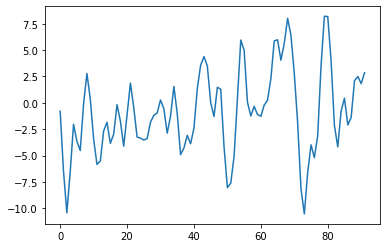

In [316]:
plt.plot(t2v_vec[:, 1:].sum(axis=1))

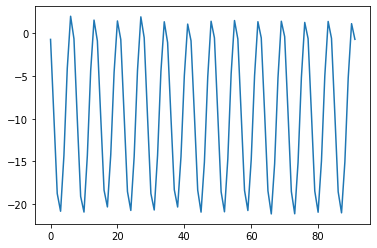

In [317]:
plt.plot(dense_vec.ravel())

In [318]:
weight = model.weights[-2].numpy()[1:].ravel()

In [319]:
freq = model.weights[2].numpy().ravel()

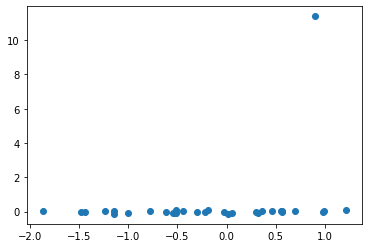

In [320]:
plt.scatter(x=freq, y=weight)

In [321]:
freq[np.argmax(weight)]

0.8967485

In [322]:
2*np.pi/7

0.8975979010256552